In [ ]:
!kaggle datasets download -d stefancomanita/top-us-songs-from-1950-to-2019-w-lyrics

In [4]:
!unzip top-us-songs-from-1950-to-2019-w-lyrics.zip -d data_input

Archive:  top-us-songs-from-1950-to-2019-w-lyrics.zip
  inflating: data_input/topSongsLyrics1950_2019.csv  


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for word processing
import re
import nltk
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS


import warnings

warnings.filterwarnings('ignore')

# Introduction

So i just want to try things i havent tried in a while, yep thats right. s I got this dataset from kaggle and this notebook is a few adjustment i made it from other participants that submit it on kaggle. Feel free to give me any feedback from this notebook! :)

[Kaggle Dataset](https://www.kaggle.com/datasets/stefancomanita/top-us-songs-from-1950-to-2019-w-lyrics/data)

# Lets take a look

In [44]:
df = pd.read_csv('./data_input/topSongsLyrics1950_2019.csv', encoding='ISO-8859-1')
df.head()

,year,rank,artist,song,lyrics
0,1950,1,Fats Domino,The Fat Man,"They call, they call me the fat man|'Cause I w..."
1,1950,2,Percy Mayfield,Please Send Me Someone To Love,"Understanding and peace of mind|But, if it's n..."
2,1950,3,Ruth Brown,Teardrops From My Eyes,I think of you|And that's the time|I feel so b...
3,1950,4,Nat King Cole,Mona Lisa,"Mona Lisa, Mona Lisa, men have named you|You'r..."
4,1950,5,Patti Page,Tennessee Waltz,When an old friend I happened to see|I Introdu...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    700 non-null    int64 
 1   rank    700 non-null    int64 
 2   artist  700 non-null    object
 3   song    700 non-null    object
 4   lyrics  696 non-null    object
dtypes: int64(2), object(3)
memory usage: 27.5+ KB


In [46]:
# find missing lyrics by using loc
df.loc[df['lyrics'].isnull()]

,year,rank,artist,song,lyrics
24,1952,5,Jimmy Forrest,Night Train,NaN
28,1952,9,Little Walter,Juke,NaN
88,1958,9,Link Wray,Rumble,NaN
120,1962,1,Booker T. & the MG's,Green Onions,NaN


i believe we can just keep this data without the need to dropping it.

In [47]:
# lets find each rank's count

df['rank'].value_counts()

rank
1     70
2     70
3     70
4     70
5     70
6     70
7     70
8     70
9     70
10    70
Name: count, dtype: int64

In [48]:
# find is there any duplicate songs

df['song'].value_counts()

song
Family Affair                      2
Walk This Way                      2
Crazy                              2
One                                2
Creep                              2
                                  ..
Killing Me Softly with His Song    1
Goodbye Yellow Brick Road          1
That Lady                          1
No Woman, No Cry                   1
Circles                            1
Name: count, Length: 691, dtype: int64

In [49]:
# list songs that have the same title
song_counts = df['song'].value_counts()

# filter songs that have a count of 2
song_counts_2 = song_counts[song_counts == 2]

# print the songs that have a count of 2
print(song_counts_2)


song
Family Affair    2
Walk This Way    2
Crazy            2
One              2
Creep            2
Hound Dog        2
Runaway          2
Money            2
Closer           2
Name: count, dtype: int64


In [50]:
# show the duplicate song names with their ranks and year

df[df['song'] =='Family Affair']



,year,rank,artist,song,lyrics
219,1971,10,Sly and the Family Stone,Family Affair,It's a family affair|It's a family affair|It's...
515,2001,6,Mary J. Blige,Family Affair,Let's get it crunk up on|Have fun up on up in ...


This is really interesting, i thought that the songs have same artist. lets try break it down some more.

In [51]:
num_duplicate_songs = df[df.duplicated(subset=['song'], keep=False)].sort_values('song')[['song', 'artist', 'year']]
print(f"There are {num_duplicate_songs.shape[0]} songs that have the same title but different artist.")
num_duplicate_songs


There are 18 songs that have the same title but different artist.


,song,artist,year
662,Closer,Chainsmokers (feat. Halsey),2016
442,Closer,Nine Inch Nails,1994
560,Crazy,Gnarls Barkley,2006
111,Crazy,Patsy Cline,1961
446,Creep,TLC,1994
422,Creep,Radiohead,1992
515,Family Affair,Mary J. Blige,2001
219,Family Affair,Sly and the Family Stone,1971
37,Hound Dog,Willie Mae Big Mama Thornton,1953
60,Hound Dog,Elvis Presley,1956


soo.. there isnt any song that stays on track over the year. it only happens with different artist.

In [52]:
# find out artist that keep appearing in the list

df['artist'].value_counts()

artist
Beatles           12
Madonna            8
Rolling Stones     7
Prince             6
Hank Williams      6
                  ..
The Clash          1
The B-52's         1
Funkadelic         1
Gloria Gaynor      1
Post Malone        1
Name: count, Length: 487, dtype: int64

In [58]:
beatles_songs = pd.DataFrame(df[df['artist'] == 'Beatles']['song'].unique(), columns=['Song'])
beatles_songs

,Song
0,She Loves You
1,I Want To Hold Your Hand
2,I Saw Her Standing There
3,Please Please Me
4,A Hard Day's Night
5,Yesterday
6,Ticket To Ride
7,A Day In The Life
8,Strawberry Fields Forever
9,Hey Jude


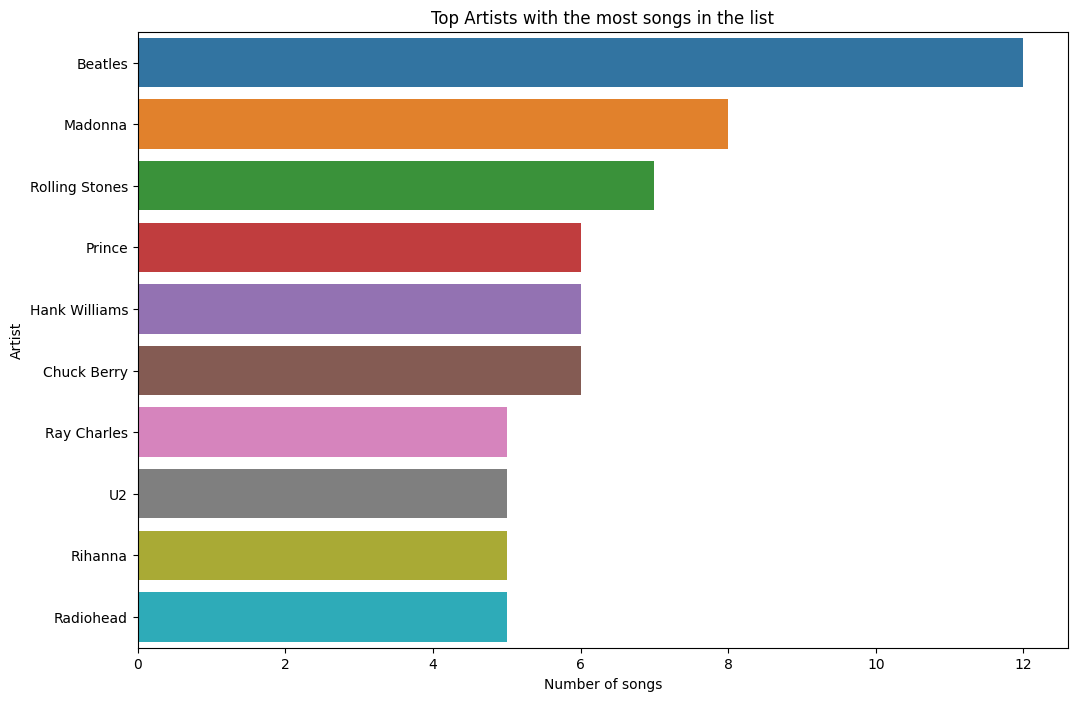

In [72]:
top_artists = df['artist'].value_counts()
top_artists = top_artists[top_artists >= 5]

# plot the top artists
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top Artists with the most songs in the list')
plt.xlabel('Number of songs')
plt.ylabel('Artist')
plt.show()


In [75]:
# find out beatles song and year
df[df['artist'] == 'Beatles'].sort_values('year')[['song', 'year']]


,song,year
131,She Loves You,1963
132,I Want To Hold Your Hand,1963
134,I Saw Her Standing There,1963
139,Please Please Me,1963
148,A Hard Day's Night,1964
156,Yesterday,1965
158,Ticket To Ride,1965
174,A Day In The Life,1967
178,Strawberry Fields Forever,1967
181,Hey Jude,1968


In [76]:
df[df['artist'] == 'Madonna'].sort_values('year')[['song', 'year']]

,song,year
334,Holiday,1983
341,Like a Virgin,1984
353,Into the Groove,1985
363,Papa Don't Preach,1986
391,Like a Prayer,1989
402,Vogue,1990
484,Ray Of Light,1998
509,Music,2000


In [77]:
df[df['artist'] == 'Rolling Stones'].sort_values('year')[['song', 'year']]

,song,year
150,(I Can't Get No) Satisfaction,1965
167,Paint It Black,1966
185,Jumpin' Jack Flash,1968
188,Sympathy For The Devil,1968
193,Honky Tonk Women,1969
197,Gimme Shelter,1969
314,Start Me Up,1981


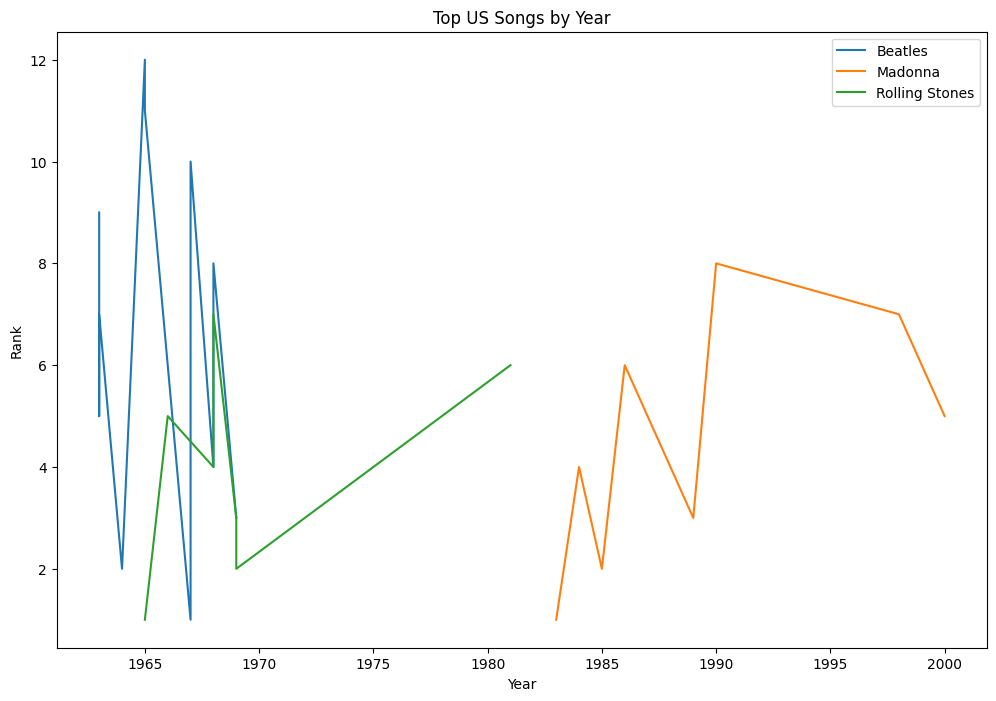

In [81]:
bt = df[df['artist'] == 'Beatles'].sort_values('year')[['song', 'year']]
md = df[df['artist'] == 'Madonna'].sort_values('year')[['song', 'year']]
rs = df[df['artist'] == 'Rolling Stones'].sort_values('year')[['song', 'year']]
plt.figure(figsize=(12, 8))
plt.plot(bt['year'], bt['song'].rank(), label='Beatles')
plt.plot(md['year'], md['song'].rank(), label='Madonna')
plt.plot(rs['year'], rs['song'].rank(), label='Rolling Stones')
plt.legend()
plt.title('Top US Songs by Year')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.show()


In [84]:
# create a function to clean the lyrics

def clean_lyrics(lyrics):
    if isinstance(lyrics, str):
        lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics)  # remove text in parenthesis
        lyrics = re.sub(r'[\n]', ' ', lyrics)  # remove new line
        lyrics = re.sub(r'[\W]', ' ', lyrics)  # remove non-word characters
        lyrics = re.sub(r'\d+', '', lyrics)  # remove numbers
        lyrics = lyrics.lower()  # convert to lowercase
        return lyrics
    else:
        return ''

df['clean_lyrics'] = df['lyrics'].apply(clean_lyrics)
df.head()


,year,rank,artist,song,lyrics,clean_lyrics
0,1950,1,Fats Domino,The Fat Man,"They call, they call me the fat man|'Cause I w...",they call they call me the fat man cause i w...
1,1950,2,Percy Mayfield,Please Send Me Someone To Love,"Understanding and peace of mind|But, if it's n...",understanding and peace of mind but if it s n...
2,1950,3,Ruth Brown,Teardrops From My Eyes,I think of you|And that's the time|I feel so b...,i think of you and that s the time i feel so b...
3,1950,4,Nat King Cole,Mona Lisa,"Mona Lisa, Mona Lisa, men have named you|You'r...",mona lisa mona lisa men have named you you r...
4,1950,5,Patti Page,Tennessee Waltz,When an old friend I happened to see|I Introdu...,when an old friend i happened to see i introdu...


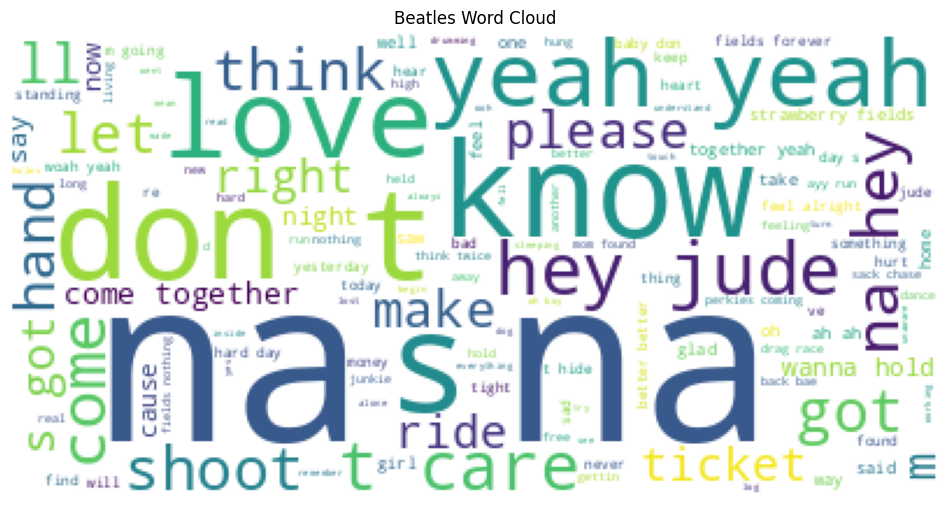

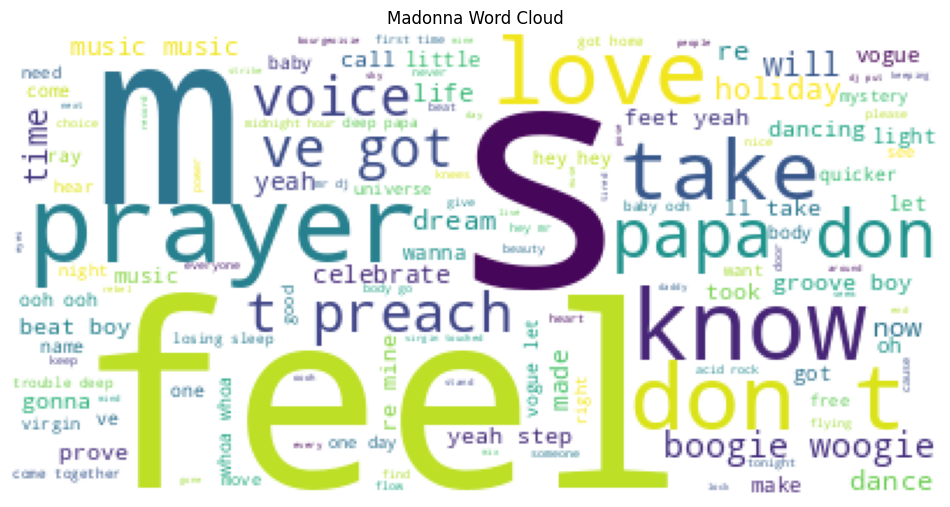

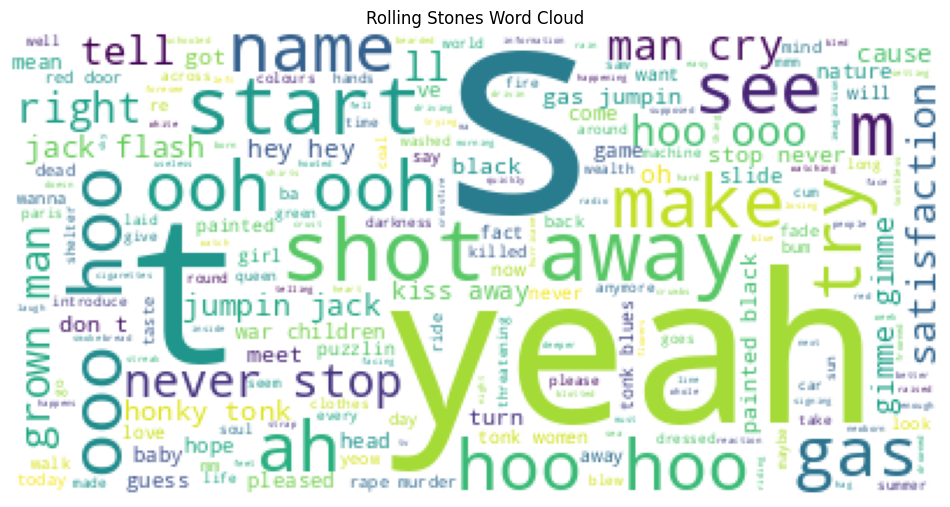

In [85]:
# find the word frequency of the lyrics from the top 3 artists

beatles_lyrics = df[df['artist'] == 'Beatles']['clean_lyrics'].str.cat(sep=' ')
madonna_lyrics = df[df['artist'] == 'Madonna']['clean_lyrics'].str.cat(sep=' ')
rolling_stones_lyrics = df[df['artist'] == 'Rolling Stones']['clean_lyrics'].str.cat(sep=' ')

# create a word cloud for the top 3 artists
plt.figure(figsize=(12, 8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white').generate(beatles_lyrics))
plt.axis('off')
plt.title('Beatles Word Cloud')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white').generate(madonna_lyrics))
plt.axis('off')
plt.title('Madonna Word Cloud')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white').generate(rolling_stones_lyrics))
plt.axis('off')
plt.title('Rolling Stones Word Cloud')
plt.show()



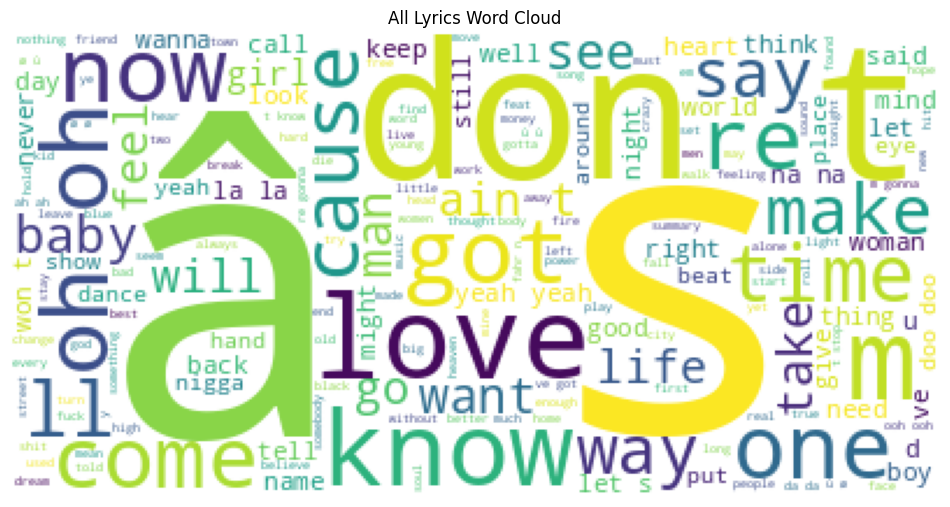

In [86]:
# find the word frequency of all the lyrics

all_lyrics = df['clean_lyrics'].str.cat(sep=' ')

# create a word cloud for all the lyrics
plt.figure(figsize=(12,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white').generate(all_lyrics))
plt.axis('off')
plt.title('All Lyrics Word Cloud')
plt.show()